3.05 Graded Assignment: Transformations to Achieve Linearity  
AP Statistics  
Eric Nguyen  
20 Dec 2018

# *Graded Assignment*
## Practice: Transformations to Achieve Linearity

### Table of Common Transformations
---
There are many types of associations that you may encounter. This table lists the most common, and summarizes the way each is transformed. (Warning: This is by no means a complete list of every possible transformation!)

| Appearance of Plot | Possible Association | Type of Transformation |
| :---: | :---: | :---: |
| <img src="./478319_files/01.jpg"> | **Exponential*** $$ y = a \times e^x $$ | Take the log (natural or base 10) <br> of the dependent ($y$) variable. |
| <img src="./478319_files/02.jpg"> | **Logarithmic** $$ y = \ln x $$ | Take the log of the independent <br> ($x$) variable. |
| <img src="./478319_files/03.jpg"> | **Quadratic*** $$ y = ax^2 + bx + c $$ | Take the square root of <br> the dependent ($y$) variable. |
| <img src="./478319_files/04.jpg"> | **Power*** $$ y = a \times x^b $$ | Take the log of both variables. |
| <img src="./478319_files/05.jpg"> | **Complex*** <br> More than one type of <br> curve put together. Equations <br> for different sections may vary. | Partition data where the plot changes. <br> Treat each part as a separate association. |

**\*** Note that these three associations have graphs that are very similar. The context of your data may give you a hint about the transformation to try first. You may need to try more than one to find the best transformation.

### General Procedure for Transforming Data
---
You must always start by looking at a scatterplot of your original data, and examining the pattern. Are there outliers or influential points? What is the shape of the curve? The shape is a guide to choosing a likely transformation. If the points seem to lie in a straight line, you may not need to transform the data at all; you may have a linear relationship.

If the explanatory variable involves time, particularly in years, you may want to change the variable to a form easier to work with. For example, if you were studying the U.S. population during the 1800's, looking for the effect of the Civil War, you might pick 1800 to be "zero". Then figure your explanatory variable in terms of years elapsed since 1800: 1820 becomes 20.

### Remember to "Back-Transform" When you Predict $y$-Values
---
Remember that, whether you work with your calculator or a spreadsheet, you'll have results expressed simply in $x$ and $y$. The correct variable for prediction is $\hat{y}$. And either variable may actually be transformed ($\ln$, exponential, square, square root, and so on).

### Things to Avoid
---
If your transformation involves taking a logarithm, remember that logarithms are undefined for zero and negative numbers.

---
Questions 1 through 6 work with the length of the sidereal year vs. distance from the sun. The table of data is shown below.

| Planet | Distance from Sun <br> (in millions of miles) | Years (as a fraction <br> of Earth years) | $\ln(\text{Dist})$ | $\ln(\text{Year})$ |
| :---: | :---: | :---: | :---: | :---: |
| Mercury | 36.19 | 0.2410 | 3.5889 | -1.4229 |
| Venus | 67.63 | 0.6156 | 4.2140 | -0.4851 |
| Earth | 93.50 | 1.0007 | 4.5380 | 0.0007 |
| Mars | 142.46 | 1.8821 | 4.9591 | 0.6324 |
| Jupiter | 486.46 | 11.8704 | 6.1871 | 2.4741 |
| Saturn | 893.38 | 29.4580 | 6.7950 | 3.3830 |
| Uranus | 1,794.37 | 84.0100 | 7.4924 | 4.4309 |
| Neptune | 2,815.19 | 164.7800 | 7.9428 | 5.1046 |
| Pluto | 3,695.95 | 248.5400 | 8.2150 | 5.5156 |

In [1]:
%config InlineBackend.figure_format='retina'

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

distance = [36.19,67.63,93.50,142.46,486.46,893.38,1794.37,2815.19,3695.95]
year = [0.2410,0.6156,1.0007,1.8821,11.8704,29.4580,84.0100,164.7800,248.5400]

def linspace(x, pts = 1000):
    return np.linspace(min(x), max(x), pts)

def scatter(
    x = distance,
    y = year,
    title = "Sidereal Year vs. Distance from Sun",
    xlab = "Distance from Sun (in millions of miles)",
    ylab = "Years (as a fraction of Earth years)"
):
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid(True)
    plt.scatter(x, y, facecolor = "black")
    
def reg(x = distance, y = year, deg = 1):
    fit = np.polyfit(x, y, deg)
    model = np.poly1d(fit)
    return model
    
def pltreg(x = distance, y = year, deg = 1):
    xp = np.linspace(min(x), max(x), 1000)
    plt.plot(xp, reg(x, y, deg)(xp), color = "red")
    
def info(x = distance, y = year, deg = 1):
    print("Pearson's r: ", pearsonr(x, y)[0])
    print("Pearson's r-squared: ", np.power(pearsonr(x, y)[0], 2))
    print("Regression equation: ", reg(x, y, deg))

#### 1. Draw a scatterplot of Distance vs. Year (using the untransformed data) with the least-squares regression line. Does the line seem to model the relationship well?

Pearson's r:  0.9887050851005595
Pearson's r-squared:  0.9775377453037047
Regression equation:   
0.06538 x - 12.56


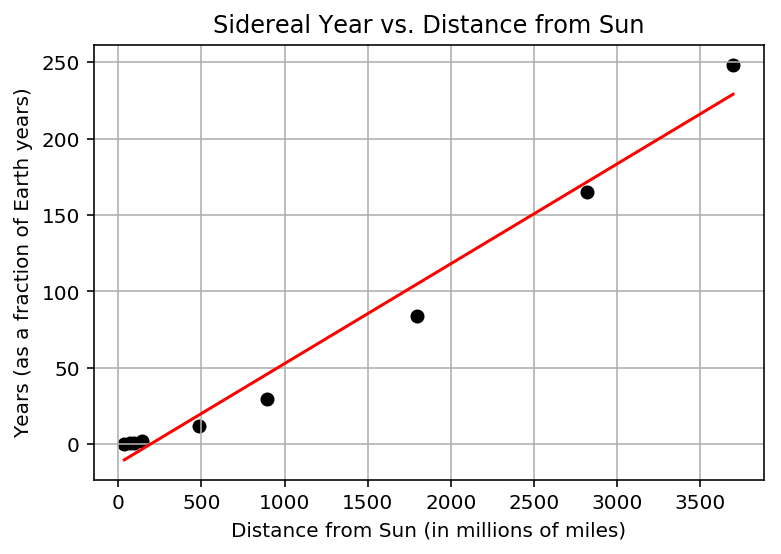

In [2]:
scatter()
pltreg()
info()

#### Answer 1:
> The line seems to model the relationship well.

#### 2. Do a linear regression for these different combinations:

- Distance vs. $\ln$(Year)
- $\ln$(Distance) vs. Year
- $\ln$(Distance) vs $\ln$(Year)

(Note that the explanatory variable is always some form of "Distance".) To get the most out of this Assignment, look at a scatterplot of each of these combinations.

#### Which transformation yields the highest correlation coefficient (Pearson's $r$)? Sketch a scatterplot of this transformation and show the least-squares line. What is the value of $r$ and $r^2$ for that transformation, and what regression equation does it yield?

In [3]:
print("Distance vs. ln(Year):")
info(distance, np.log(year))

print("\nln(Distance) vs. Year:")
info(np.log(distance), year)

print("\nln(Distance) vs. ln(Year):")
info(np.log(distance), np.log(year))

Distance vs. ln(Year):
Pearson's r:  0.8936102240869358
Pearson's r-squared:  0.7985392325927037
Regression equation:   
0.001704 x + 0.2829

ln(Distance) vs. Year:
Pearson's r:  0.8250193518451514
Pearson's r-squared:  0.6806569309189937
Regression equation:   
42.89 x - 196.7

ln(Distance) vs. ln(Year):
Pearson's r:  0.9999999210135239
Pearson's r-squared:  0.9999998420270539
Regression equation:   
1.499 x - 6.804


##### **Combination 1: Distance vs ln(Year)**

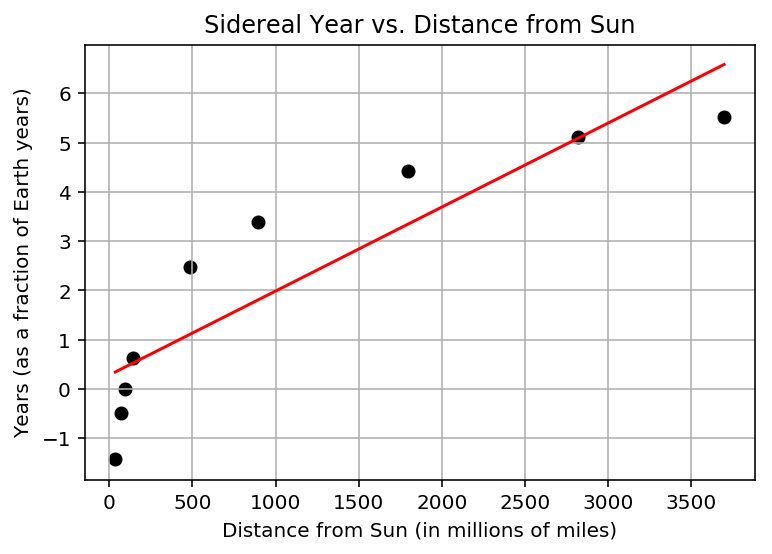

In [4]:
scatter(distance, np.log(year))
pltreg(distance, np.log(year))

##### **Combination 2: ln(Distance) vs Year**

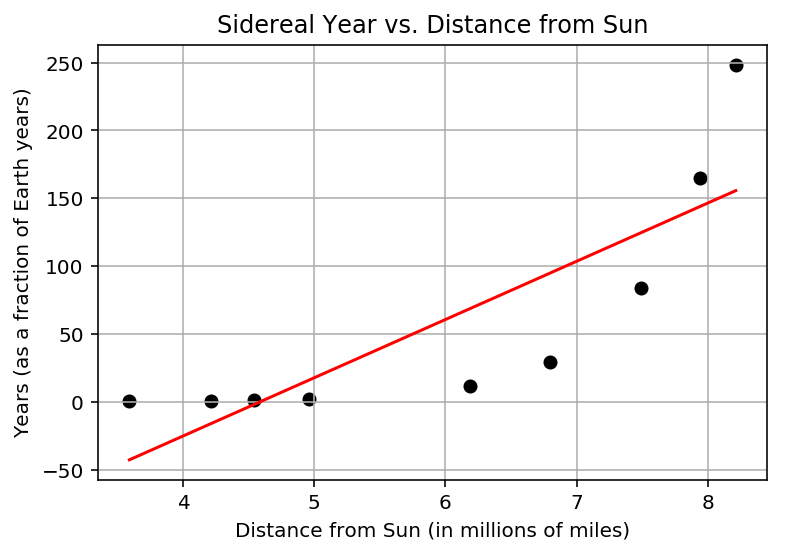

In [5]:
scatter(np.log(distance), year)
pltreg(np.log(distance), year)

##### **Combination 3: ln(Distance) vs ln(Year)**

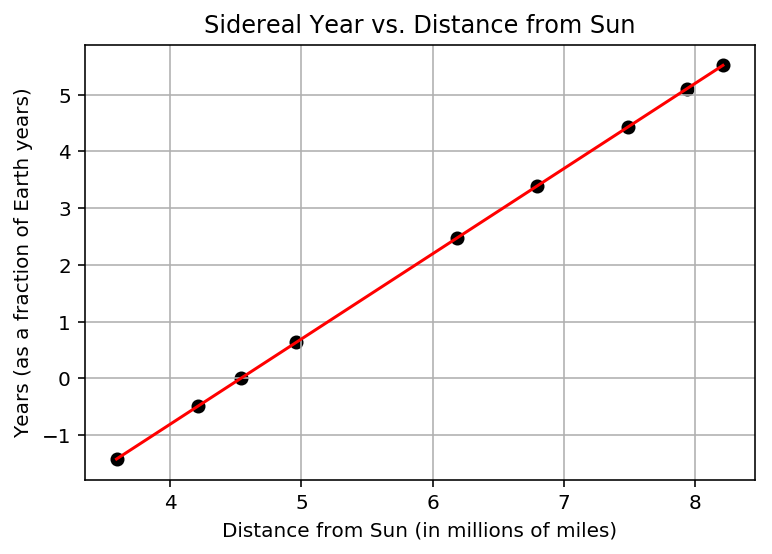

In [6]:
scatter(np.log(distance), np.log(year))
pltreg(np.log(distance), np.log(year))

#### Answer 2:
> The third combination, with the natural log applied to both variables, yields the highest correlation coefficient. Below are the transformation's $r$, $r^2$, and $\hat{y}$:

$$ r \approx 1 $$
$$ r^2 \approx 1 $$
$$ \hat{y} = 1.499x - 6.804 $$

#### 3. Using the regression equation from the previous question that *best fits the data*, create a residual plot and interpret it.

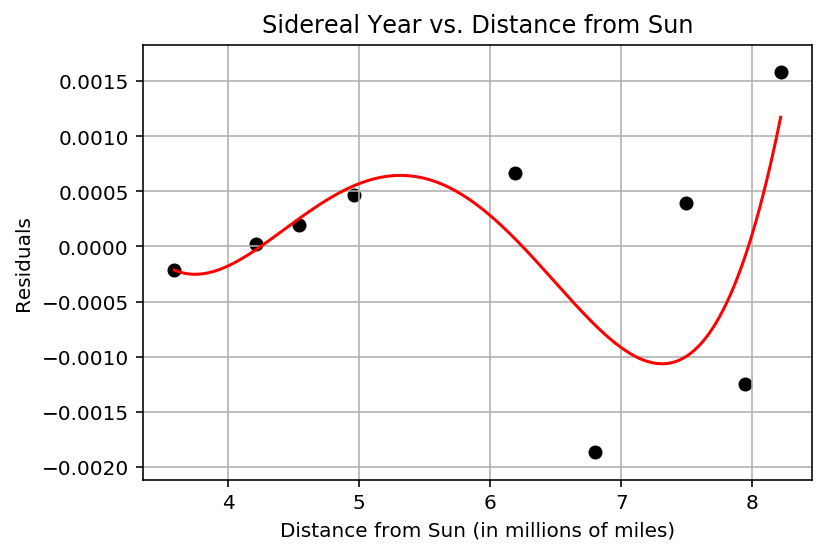

In [7]:
def residuals(x, y, deg = 1):
    return y - reg(x, y, deg)(x)

def pltres(x, y, deg = 1, padding = 0.00025):
    resid = residuals(x, y, deg)
    plt.gca().set_ylim([min(resid) - padding, max(resid) + padding])
    scatter(x, resid, ylab = "Residuals")
    
def pltresreg(x, y, deg = 1):
    pltreg(x, residuals(x, y), deg)
    
pltres(np.log(distance), np.log(year))
pltresreg(np.log(distance), np.log(year), 4)

#### Answer 3:
> The residual plot seems to be random, so I think the linear regression equation is a good fit.

#### 4. Using algebra, convert the regression equation to a power equation and verify that the power equation is a good fit for this data. (show your work below).

#### As you set up your regression equation, keep in mind that the variables are $\ln{9}$ and $\ln{x}$.

#### Here's what the graph of the scatterplot and power equation will look like. (It's up to you to derive the power equation.)

<img src="./478319_files/07.jpg">

#### Finally, summarize, in plain English, what you've done in questions 1-4.

$$\begin{align}
\hat{y} &= 1.499x - 6.804 \\
\ln{\hat{y}} &= \ln{\left(1.499x - 6.804\right)} \\
\hat{y} &= e^{\ln{\left(1.499x - 6.804\right)}} \\
\end{align}$$

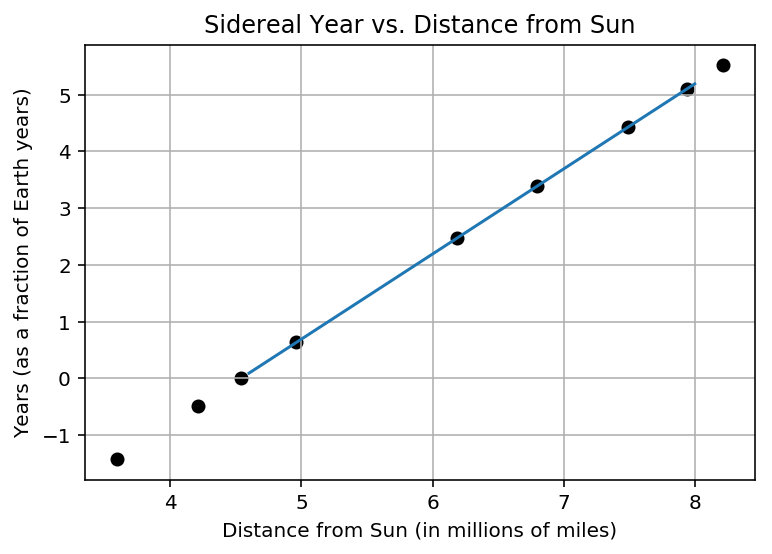

In [8]:
power_eq = lambda x: np.power(np.e, np.log(1.499 * x - 6.804))
scatter(np.log(distance), np.log(year))
xp = linspace([4.6, 8])
plt.plot(xp, power_eq(xp))

#### Answer 4:
> $\hat{y}=\left(x^{1.499}\right)\left(e^{−6.804}\right)$

> In questions 1-4, I transformed the curved data to form a straight line and then I analyzed the transformed data.

#### 5. The purpose of the transformations you're studying is to find a simple model to describe the relationship in a data set. The model can be used to predict a response value (called ***interpolation*** for values within the range of the data set and ***extrapolation*** for values outside the range of the data set). Recall that extrapolation is usually not a valid way to predict $y$-values.

#### A well-known feature of our solar system is the asteroid belt between Mars and Jupiter. One theory about the asteroid belt is that it's made of primordial material that was prevented from forming another planet by the gravitational pull of Jupiter when the solar system was formed. One of the largest asteroid is 951 Gaspra. Its distance from the Sun is 207.16 million miles. Use your linear regression equation to interpolate the length of its sidereal year.

Remember that you need to take the natural log of Distance before you plug it in, and that your first result will be the natural log of Year. Show your work.

In [9]:
ans5 = reg(np.log(distance), np.log(year))(np.log(207.16))
ans5

1.1933582712316335

#### Answer 5:
$$\begin{align}
\hat{y} &= 1.499x - 6.804 \\
\hat{y} &= 1.499\left(207.16\right) - 6.804 \\
\hat{y} &\approx 1.19
\end{align}$$

> The length of a 951 Gaspra's sidereal year is approximately 1.19 Earth years.

#### 6. Finally, calculate the length of the year for 951 Gaspra from the power function you developed in Question 4. (Show all your work)

**Note:** Theoretically, the answers from 5 and 6 should be the same, but they'll probably come out differently due to rounding between steps. The more digits you carry throughout the calculations, the closer the two answers will be.

In [10]:
ans6 = power_eq(np.log(207.16))
ans6

1.1909036708919816

#### Answer 6:
> $\hat{y} \approx 1.19$

#### Questions 7 through 9 involve the following data set.

#### Increase in Life Expectancy in the United States during the 20th Century
---
| Year | Expected Life Span |
| :-: | :-: |
| 1920 | 54.1 |
| 1930 | 59.7 |
| 1940 | 62.9 |
| 1950 | 68.2 |
| 1960 | 69.7 |
| 1970 | 70.8 |
| 1975 | 72.6 |
| 1980 | 73.7 |
| 1985 | 74.7 |
| 1990 | 75.4 |
| 1995 | 75.8 |

Source: National Center for Health Statistics, published in the 1998 *World Almanac*

In [11]:
year2 = np.array([1920,1930,1940,1950,1960,1970,1975,1980,1985,1990,1995])
els = np.array([54.1,59.7,62.9,68.2,69.7,70.8,72.6,73.7,74.7,75.4,75.8])
year2 -= 1900

#### 7. Make a scatterplot of the *untransformed* data and tell which kind of relationship the points seem to follow. Also name the best type of transformation needed to "straighten" the plot.

**Note**: Part of the transformation should involve subtracting 1900 from the year so you're working with more manageable numbers.

Pearson's r:  0.9754069354835918
Pearson's r-squared:  0.9514186897894918
Regression equation:   
0.2747 x + 51.52


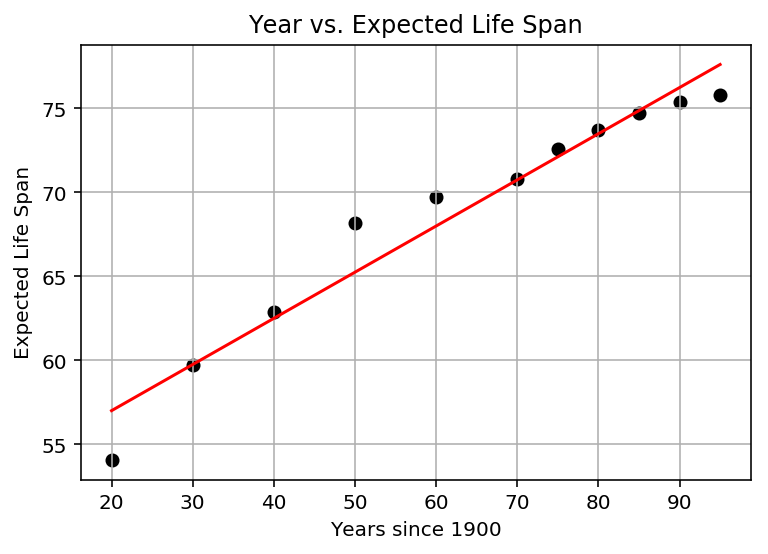

In [12]:
def scatter2(
    x = year2, 
    y = els,
    title = "Year vs. Expected Life Span",
    xlab = "Years since 1900",
    ylab = "Expected Life Span"
):
    scatter(x, y, title, xlab, ylab)
scatter2()
pltreg(year2, els)
info(year2, els)

#### Answer 7:
> The points seem to follow a positive relationship. The best transformation needed to "straighten" the plot would be an exponential transformation and subtracting 1900 from the year.

#### 8. Now try some transformations to get thet data as close to linear as possible. (Use your calculator to transform the data, and try scatterplots of the different transformations). Then find the regression line, $r$, and $r^2$.

Tell which transformation worked the best and back it up by showing:
- A scatterplot of the transformed data with the least-squares regression line, $r$, and $r$-squared.
- A plot of the original data with the regression equation converted to a non-linear equation (similar to what you did for question 6)
(You'll get a chance to do a residual plot in the next question.)

Here are some hints:
- Look at the curve and think about what kind of relationship (equation) could have made such a curve (this is what you already did in question 7).
- Then try the kind of transformation that should work for that kind of curve. (See the Summary of Common Transformations at the beginning of this document.) If your first guess doesn't work, try others.
- More than one transformation will yield a good model; choose the one with the strongest value of $r$.
- If your transformation (the one that seems to work the best) doesn't match your answer for question 7, you may want to revise your answer for question 7!

Pearson's r:  0.9957632463724356
Pearson's r-squared:  0.9915444428261719
Regression equation:   
2.251e+09 x - 2.157e+10


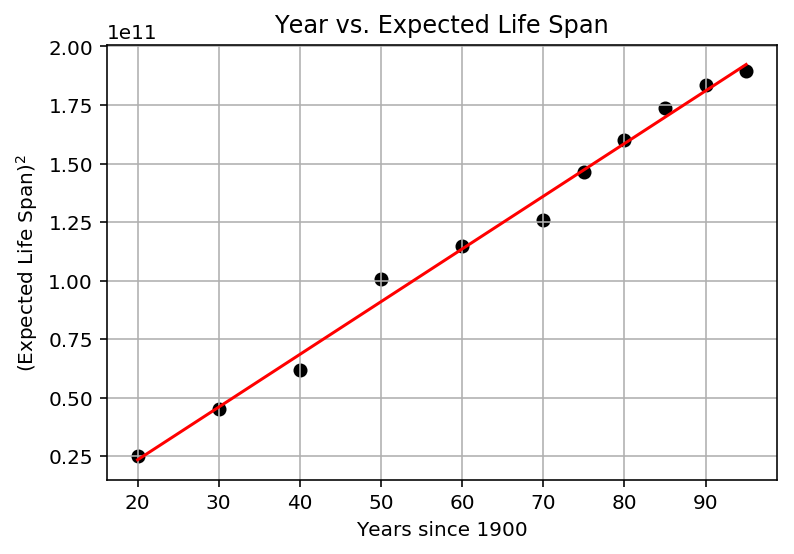

In [13]:
info(year2, np.power(els, 6))
scatter2(
    year2,
    np.power(els, 6),
    ylab = "(Expected Life Span)$^2$"
)
pltreg(year2, np.power(els, 6))

#### Answer 8:
$$\begin{align}
\hat{y} &= 2251000000x - 21570000000 \\
r &\approx 0.996 \\
r^2 &\approx 0.992
\end{align}$$

#### 9. Using the transformed data and the regression equation for it, create a plot of residuals vs. $x$-values. Sketch the plot and interpret it.

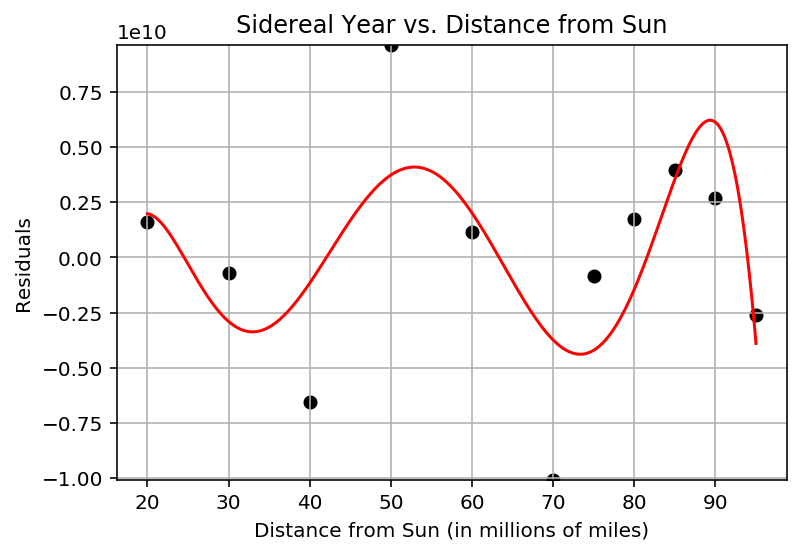

In [14]:
pltres(year2, np.power(els, 6))
pltresreg(year2, np.power(els, 6), 6)

#### Answer 9:
> The residual plot for the transformed data appears to be random, indicating a good linear fit.

#### 10. The data below represents Medicare expenditures from 1970 to 1996, in billions of dollars.

| Year | Medicare <br> Expenditures <br> (billions of dollars) |
| :-: | :-: |
| 1970 | 7.6 |
| 1980 | 37.5 |
| 1985 | 72.1 |
| 1990 | 112.1 |
| 1991 | 124.4 |
| 1992 | 141.4 |
| 1993 | 153 |
| 1994 | 169.8 |
| 1995 | 187.9 |
| 1996 | 203.1 |

In [15]:
year3 = np.array([1970,1980,1985,1990,1991,1992,1993,1994,1995,1996])
expenditures = np.array([7.6,37.5,72.1,112.1,124.4,141.4,153,169.8,187.9,203.1])
year3 -= 1900

#### 10A. Create a scatterplot of the data.

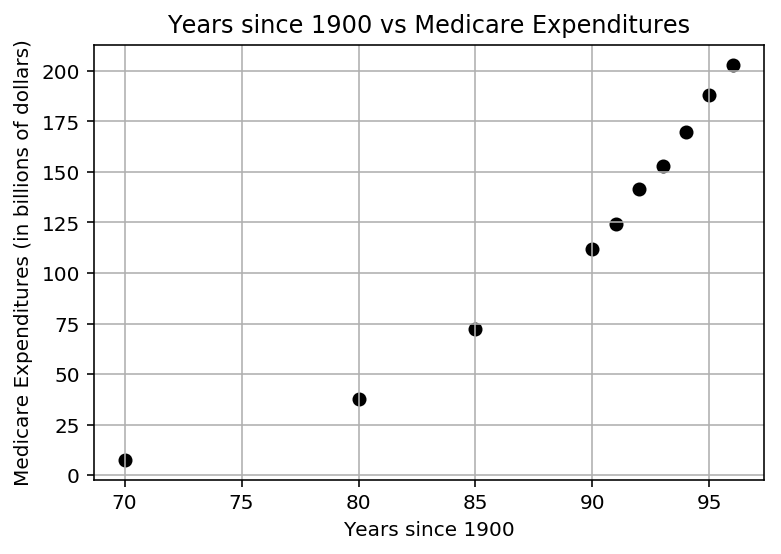

In [16]:
def scatter3(
    x = year3,
    y = expenditures,
    title = "Years since 1900 vs Medicare Expenditures",
    xlab = "Years since 1900",
    ylab = "Medicare Expenditures (in billions of dollars)"
):
    scatter(x, y, title, xlab, ylab)
scatter3()

#### 10B. Assume that the relationship of this data is exponential. Transform the data, find the regression equation, $r$, and $r^2$. Based only on the value of $r$ would you consider this a good model for extrapolating increases in Medicare spending?

In [17]:
info(np.log(year3), np.log(expenditures))

Pearson's r:  0.9970327429307129
Pearson's r-squared:  0.994074290475941
Regression equation:   
10.23 x - 41.33


In [18]:
info(np.log(year3), expenditures)

Pearson's r:  0.9415431309659584
Pearson's r-squared:  0.88650346746918
Regression equation:   
616.8 x - 2643


In [19]:
info(year3, np.log(expenditures))

Pearson's r:  0.992833325339022
Pearson's r-squared:  0.9857180119037403
Regression equation:   
0.1231 x - 6.393


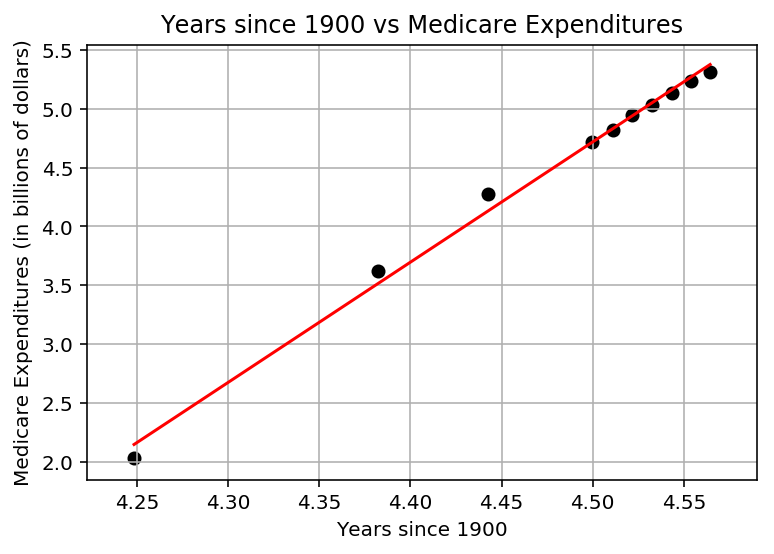

In [20]:
scatter3(np.log(year3), np.log(expenditures))
pltreg(np.log(year3), np.log(expenditures))

#### Answer 10B:
$$\begin{align}
\hat{y} &= 10.23 x - 41.33 \\
r &\approx 0.997 \\
r^2 &\approx 0.994
\end{align}$$
> Yes, based only on the value of $r$ and that the model is linear, I would consider this a good model for extrapolating increases in Medicare spending.

#### 10C. Create a residual plot of the transformed data. Does the residual plot change your mind about the usefulness of this model to extrapolate increases in Medicare spending?

**Note**: Remember that many trends don't have a perfect mathematical model to predict them because there are too many complicating factors to yield a consistent curve. Sometimes in cases like these, a rough model will work as a rough estimator when used with appropriate caution.)

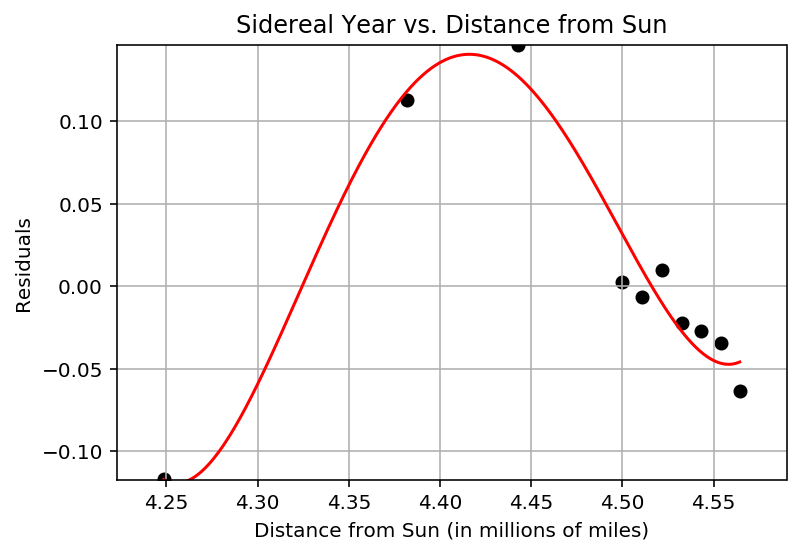

In [21]:
pltres(np.log(year3), np.log(expenditures))
pltresreg(np.log(year3), np.log(expenditures), 4)

#### Answer 10C:
> Yes, the residual plot of the transformed data does change my mind about the usefulness of this model to extrapolate increases in Medicare spending. It is not very random, indicating a non-linear trend.